In [53]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
sns.set_theme(style="white")

In [54]:
df = pd.read_excel('../data/datasets/suicide-by-city.xls')

In [55]:
df.head()

,type,year,Adana-1,Adiyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Canakkale-17,Cankiri-18,Corum-19,Istanbul-34,Izmir-35,Sanliurfa-63,Sirnak-73
0,İntihar şekli:Asarak,2022,49.0,18.0,20.0,9.0,5.0,138.0,73.0,2.0,...,5.0,11.0,19.0,21.0,3.0,17.0,238.0,89,30.0,7.0
1,İntihar şekli:Ateşli Silah Kullanarak,2022,41.0,8.0,4.0,6.0,2.0,64.0,30.0,3.0,...,2.0,6.0,9.0,11.0,3.0,20.0,116.0,46,17.0,14.0
2,İntihar şekli:Diğer,2022,1.0,2.0,3.0,NaN,1.0,8.0,2.0,NaN,...,1.0,1.0,1.0,2.0,1.0,NaN,5.0,7,3.0,NaN
3,"İntihar şekli:Doğal Gaz, Tüpgaz Vb. Kullanarak",2022,1.0,1.0,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,1.0,1.0
4,İntihar şekli:Kendini Yakarak,2022,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN


In [56]:
df['type'] = df['type'].str.split(':').str[-1]

In [57]:
df['type']

0                                               Asarak
1                              Ateşli Silah Kullanarak
2                                                Diğer
3                     Doğal Gaz, Tüpgaz Vb. Kullanarak
4                                      Kendini Yakarak
5                           Kesici Bir Alet Kullanarak
6                             Kimyevi Madde Kullanarak
7                                       Suya Atlayarak
8    Tren Veya Başka Motorlu Bir Araç Altına Atlayarak
9                                  Yüksekten Atlayarak
Name: type, dtype: object

In [58]:
df.columns = [i.split('-')[0] for i in df.columns]

In [59]:
df = pd.melt(frame=df, id_vars=['type','year'], value_name='value', var_name='city')

In [60]:
df.head()

,type,year,city,value
0,Asarak,2022,Adana,49.0
1,Ateşli Silah Kullanarak,2022,Adana,41.0
2,Diğer,2022,Adana,1.0
3,"Doğal Gaz, Tüpgaz Vb. Kullanarak",2022,Adana,1.0
4,Kendini Yakarak,2022,Adana,NaN


In [61]:
df_total = df.groupby(by=['city','year'])['value'].sum().reset_index().reset_index(drop=True)

In [62]:
df_total.sample(3)

,city,year,value
57,Mersin,2022,142.0
73,Tokat,2022,31.0
72,Tekirdag,2022,70.0


In [63]:
turkey_df = gpd.read_file('../data/shapefiles/turkeyborder/TUR_adm1.shp')
turkey_df.columns


Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')

In [64]:
turkey_df['NAME_1']

0     Çanakkale
1       Çankiri
2         Çorum
3         Adana
4      Adiyaman
        ...    
76         Usak
77          Van
78       Yalova
79       Yozgat
80    Zinguldak
Name: NAME_1, Length: 81, dtype: object

In [65]:
replace_map = [
    ['Çanakkale','Canakkale'],
    ['Çorum','Corum'],
    ['Çankiri','Cankiri'],
    ['K. Maras','Kahramanmaras'],
    ['Gümüshane','Gumushane'],
    ['Kinkkale','Kirikkale'],
    ['Iğdır','Igdir'],
    ['Zinguldak','Zonguldak'],
    ['Afyon','Afyonkarahisar'],
    ['Kütahya','Kutahya'],
    ['Elazığ','Elazig'],
    ['Bingöl','Bingol'],
    ['Bartın','Bartin'],
    ['Karabük','Karabuk'],
    ['Düzce','Duzce'],
]

for r in replace_map:
    turkey_df.replace(r[0], r[1], inplace=True)

In [66]:
turkey_df[turkey_df['NAME_1'].str.contains('Ç')]

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry


In [67]:
merged_total = pd.merge(turkey_df, df_total, how='left', left_on='NAME_1', right_on='city')

In [68]:
merged_total.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry', 'city', 'year', 'value'],
      dtype='object')

/tmp/ipykernel_77750/1507111552.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  city_centers["center"] = city_centers["geometry"].centroid


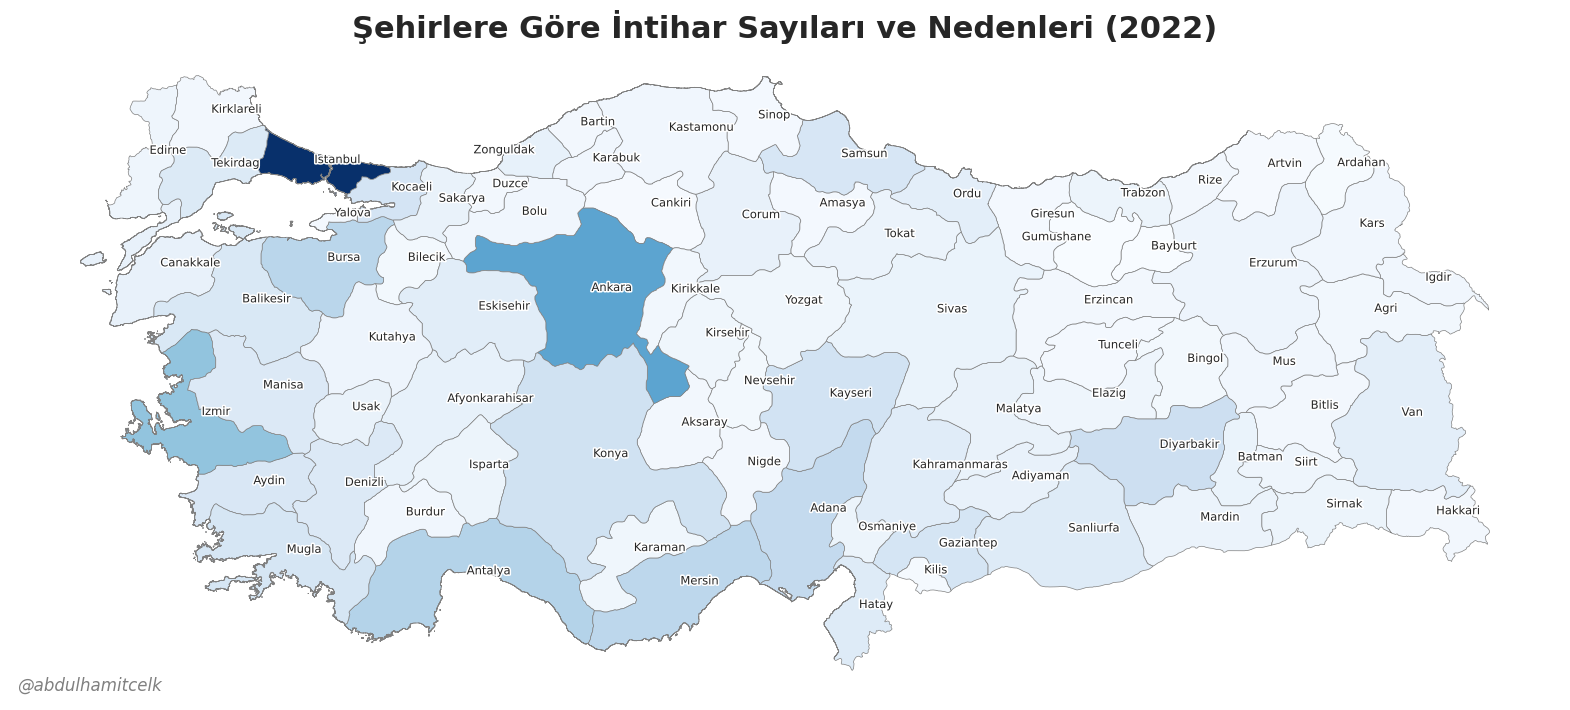

In [69]:
import adjustText as aT
import matplotlib.patheffects as pe

ax = merged_total.plot(
    column="value", 
    cmap="Blues",
    figsize=(20,10), 
    edgecolor='gray', 
    linewidth=0.5
)
ax.set_title(
    "Şehirlere Göre İntihar Sayıları ve Şekilleri (2022)",
    size = 22, 
    fontdict={'fontweight':'bold'}
)
ax.text(
    24.8,
    35.6,
    '@abdulhamitcelk', 
    fontdict={'color':'gray', 'fontstyle':'italic'}
)
ax.set_axis_off()


city_centers = merged_total.copy()
city_centers["center"] = city_centers["geometry"].centroid
city_centers.set_geometry("center", inplace = True)

texts = []

for x, y, label in zip(city_centers.center.x, city_centers.center.y, city_centers["city"]):
    texts.append(plt.text(x, y, label, fontsize = 8.3,
                    path_effects=[pe.withStroke(linewidth=2.2, foreground="white")])
                )

aT.adjust_text(texts, force_points=0.3, force_text=5, expand_points=(1,1), expand_text=(1,1))


plt.show()

# plt.savefig(
#     "suciide-by-city.png",
#     dpi = 300,
#     bbox_inches = "tight"
# )


In [70]:
merged_total

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,city,year,value
0,235,TUR,Turkey,1,Canakkale,Il,Province,NaN,NaN,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...",Canakkale,2022,40.0
1,235,TUR,Turkey,2,Cankiri,Il,Province,NaN,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...",Cankiri,2022,8.0
2,235,TUR,Turkey,3,Corum,Il,Province,NaN,NaN,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...",Corum,2022,39.0
3,235,TUR,Turkey,4,Adana,Il,Province,NaN,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...",Adana,2022,131.0
4,235,TUR,Turkey,5,Adiyaman,Il,Province,NaN,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160...",Adiyaman,2022,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,235,TUR,Turkey,77,Usak,Il,Province,NaN,Uşak,"POLYGON ((29.89273 38.77788, 29.89274 38.73051...",Usak,2022,38.0
77,235,TUR,Turkey,78,Van,Il,Province,NaN,NaN,"POLYGON ((43.34184 39.39789, 43.35878 39.38728...",Van,2022,52.0
78,235,TUR,Turkey,79,Yalova,Il,Province,NaN,NaN,"POLYGON ((29.39486 40.70208, 29.39486 40.70181...",Yalova,2022,12.0
79,235,TUR,Turkey,80,Yozgat,Il,Province,NaN,NaN,"POLYGON ((35.34320 40.21666, 35.35103 40.20958...",Yozgat,2022,21.0


In [71]:
df_reason = df.groupby('type')['value'].sum().reset_index().sort_values('value', ascending=False)

In [72]:
df_reason['value'] = df_reason['value'] * 100  / df_reason['value'].sum()

In [73]:
df_reason['value'] = df_reason['value'].round(2)

In [74]:
df_reason

,type,value
0,Asarak,46.84
1,Ateşli Silah Kullanarak,24.99
9,Yüksekten Atlayarak,13.63
6,Kimyevi Madde Kullanarak,8.51
2,Diğer,2.48
5,Kesici Bir Alet Kullanarak,1.95
7,Suya Atlayarak,0.89
3,"Doğal Gaz, Tüpgaz Vb. Kullanarak",0.34
4,Kendini Yakarak,0.22
8,Tren Veya Başka Motorlu Bir Araç Altına Atlayarak,0.14


In [75]:
sns.set_theme(style='darkgrid')

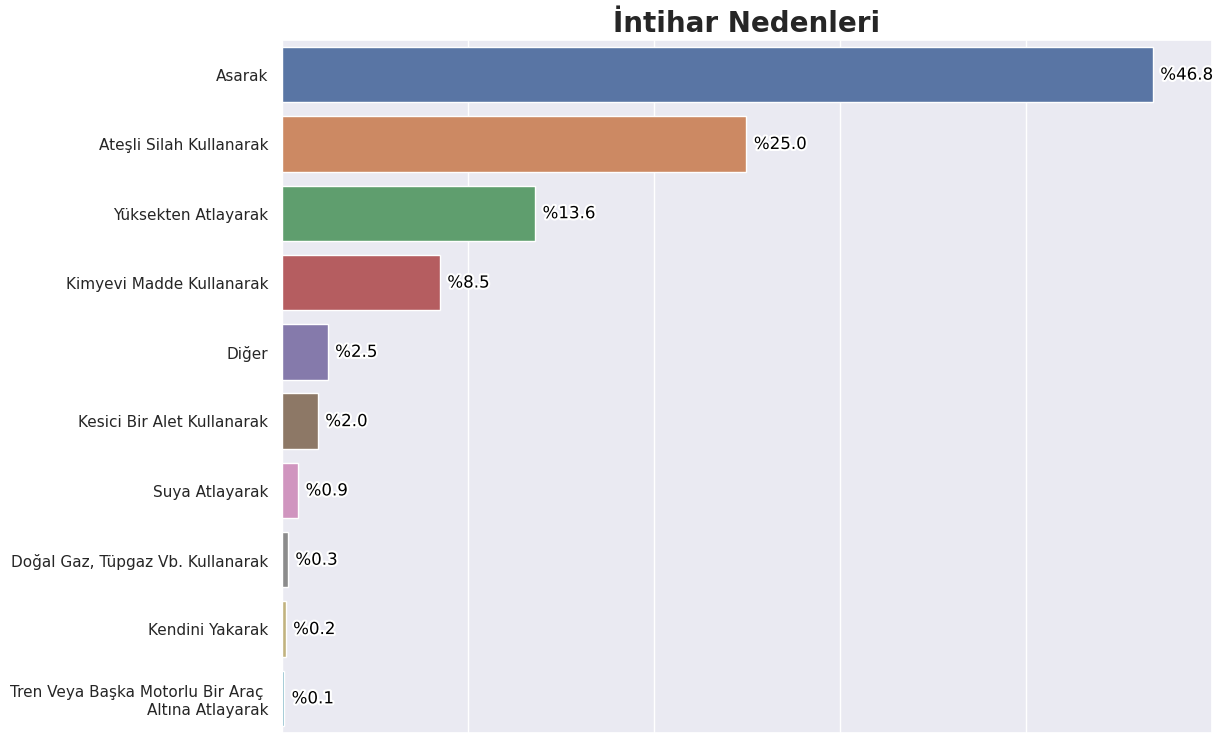

In [76]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(data=df_reason, x="value", y="type")

# ax.set_xticklabels(
#     [f'%{int(i)}' for i in ax.get_xticks()]
# )

ax.set_xlim(0,50)
ax.set_title("İntihar Şekli", size=20, fontdict={"fontweight":'bold'})
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([label if len(label) < 33 else label[0:33] + '\n' + label[33:] for label in df_reason['type']])

for p in ax.patches:
    ax.annotate(f'%{round(p.get_width(),1)}', 
                (p.get_x()+0.4 + p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black',path_effects=[pe.withStroke(linewidth=3, foreground="white")] )


plt.show()

# plt.savefig(
#     "suciide-by-reason.png",
#     dpi = 300,
#     bbox_inches = "tight"
# )